# TensorFlow Tutorial 
* Following the course [CS 20SI: Tensorflow for Deep Learning Research](http://cs20si.stanford.edu/)
* Course GitHub: https://github.com/chiphuyen/stanford-tensorflow-tutorials

In [1]:
import tensorflow as tf

/Users/d071576/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Define a graph
Reference [What is a TensorFlow Session?](https://danijar.com/what-is-a-tensorflow-session/)
* First two lines are not needed as TensorFlow would create
* Three operations are defined, and associated with the TF Graph:
    * variable
    * initialize
    * assign
* It's like defining your program (compute graph) and running it (session)

In [2]:
graph = tf.Graph()
with graph.as_default():
    variable = tf.Variable(42, name='foo')
    initialize = tf.global_variables_initializer()
    assign = variable.assign(13)

# Running Computation in a Session
* Value of the variable is only valid in a session

In [3]:
with tf.Session(graph=graph) as sess:
    sess.run(initialize)
    sess.run(assign)
    print(sess.run(variable))

13


* New session independent of the other declared sessions

In [4]:
with tf.Session(graph=graph) as sess:
    sess.run(initialize)
    print(sess.run(variable))

42


# Using TensorBoard

In [5]:
import tensorflow as tf
a = tf.constant(2)
b = tf.constant(3)
x = tf.add(a, b)

with tf.Session() as sess:
    writer = tf.summary.FileWriter("./graphs", sess.graph)
    print(sess.run(x))
    print(sess.run(tf.mod(b, a)))
    
writer.close()

5
1


# Constant types

In [6]:
# Constant 1d tensor
a = tf.constant([6, 5], name='vector') # optional name is "Vector"

# Create 2x2 tensor
b = tf.constant([2, 3], name='tensor')

mul_op = tf.multiply(a, b)

c = tf.linspace(10.0, 15.0, 5, name='linear_space')

In [7]:
with tf.Session() as sess:
    print(sess.run(a))
    print(sess.run(b))
    print(sess.run(c))
    print(sess.run(mul_op))
    print(a.eval()) # Should print the values of a

[6 5]
[2 3]
[ 10.    11.25  12.5   13.75  15.  ]
[12 15]
[6 5]


# Variable types

In [8]:
import tensorflow as tf
my_const = tf.constant([1.0, 2.0], name="my_new_const") 
print(tf.get_default_graph().as_graph_def())

node {
  name: "Const"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "Const_1"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "Add"
  op: "Add"
  input: "Const"
  input: "Const_1"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "FloorMod"
  op: "FloorMod"
  input: "Const_1"
  input: "Const"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "vector"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {

# Interactive Sessions

In [9]:
sess  =  tf.InteractiveSession()
a = tf.constant(5)
b = tf.constant(6)
c = tf.add(a,b)
print(c.eval())
sess.close()

11


# Linear regression: data of theft vs fire

Epoch 0: 845.4825156075614
Epoch 10: 520.227675642286
Epoch 20: 514.658701695147
Epoch 30: 509.4259295761585
Epoch 40: 504.50930420983406


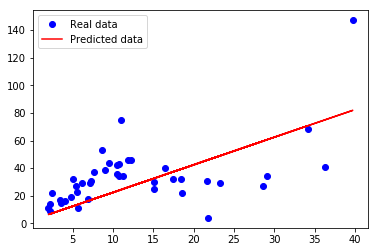

In [10]:
""" Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
Author: Chip Huyen
Prepared for the class CS 20SI: "TensorFlow for Deep Learning Research"
cs20si.stanford.edu
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

import utils

DATA_FILE = 'data/fire_theft.xls'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
# 43 rows with first row as header
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * w + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(loss)
# Why large learning rate lead to inf 

with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
    
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    
    # Step 8: train the model
    for i in range(50): # train the model 100 epochs
        total_loss = 0  # sum of losses accross all training examples
        for x, y in data:
            # Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) # {placeholder: variable}
            total_loss += l
        if (i%10==0):
            print('Epoch {0}: {1}'.format(i, total_loss/n_samples))  # average loss per training example

    # close the writer when you're done using it
    writer.close() 
    
    # Step 9: output the values of w and b
    w, b = sess.run([w, b]) 

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()

## Take away from first full use of TF in prediction
* Since each epoch goes through all of the training samples, there is no _"statistical"_ property in the loss. Those statistical property would be seen if only a random sample of the training pool to be computed. 
* Learning rate should neither be too large leading to overshooting, or two small leading to slow convergence. 
* Given a fixed learning rate, with more interations, the loss would reduce unless in special conditions.
* Given a fixed number of epoches, in a batch learning, the error in first epoch is the same independent of learning rate. However, in SGD, changing the learning rate also changes the loss of SGD even at first epoch because it parameters get updates from iterations of training samples.

# MNIST example in Minibatch setting

In [11]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import time

### Download data using TensorFlow library

In [12]:
from  tensorflow.examples.tutorials.mnist  import  input_data
MNIST = input_data.read_data_sets("/data/mnist", one_hot=True)

Extracting /data/mnist/train-images-idx3-ubyte.gz
Extracting /data/mnist/train-labels-idx1-ubyte.gz
Extracting /data/mnist/t10k-images-idx3-ubyte.gz
Extracting /data/mnist/t10k-labels-idx1-ubyte.gz


In [13]:
# Define paramaters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 10

# Step 1: Read in data from folder
# using TF Learn's built in function to load MNIST data to the folder data/mnist
mnist = input_data.read_data_sets('/data/mnist', one_hot=True) 

Extracting /data/mnist/train-images-idx3-ubyte.gz
Extracting /data/mnist/train-labels-idx1-ubyte.gz
Extracting /data/mnist/t10k-images-idx3-ubyte.gz
Extracting /data/mnist/t10k-labels-idx1-ubyte.gz


In [14]:
# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# Features are of the type float, and labels are of the type int
X = tf.placeholder(tf.float32, shape = [batch_size, 784], name='X')
Y = tf.placeholder(tf.float32, shape = [batch_size, 10], name='Y') # Should be integer? 

# Step 3: create weights and bias
# weights and biases are initialized to 0
# shape of w depends on the dimension of X and Y so that Y = X * w + b
# shape of b depends on Y

w = tf.Variable(tf.zeros([784, 10]), name='weights')
b = tf.Variable(tf.zeros([1, 10]), name='bias')

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
# to get the probability distribution of possible label of the image
# DO NOT DO SOFTMAX HERE
logits = tf.matmul(X, w) + b 

# Step 5: define loss function
# use cross entropy loss of the real labels with the softmax of logits
# use the method:
# tf.nn.softmax_cross_entropy_with_logits(logits, Y)
# then use tf.reduce_mean to get the mean loss of the batch
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y, name='loss')
loss = tf.reduce_mean(entropy)

# Step 6: define training op
# using gradient descent to minimize loss
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [15]:
with tf.Session() as sess:
    # to visualize using TensorBoard
    writer = tf.summary.FileWriter('./graphs/logistic_reg', sess.graph)

    start_time = time.time()
    sess.run(tf.global_variables_initializer()) 
    n_batches = int(mnist.train.num_examples/batch_size)
    for i in range(n_epochs): # train the model n_epochs times
        total_loss = 0

        for _ in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            _, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch}) 
            total_loss += loss_batch
        print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

    print('Total time: {0} seconds'.format(time.time() - start_time))

    print('Optimization Finished!') # should be around 0.35 after 25 epochs
    
    # test the model

    preds = tf.nn.softmax(logits)
    # Check if the maximum argument is consistent with labels
    correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32)) # need numpy.count_nonzero(boolarr) :(

    n_batches = int(mnist.test.num_examples/batch_size)
    total_correct_preds = 0

    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(batch_size)
        accuracy_batch = sess.run([accuracy], feed_dict={X: X_batch, Y:Y_batch})  
        total_correct_preds += int(accuracy_batch[0])
        
    print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))
    
    writer.close()

Average loss epoch 0: 0.3666749327054946
Average loss epoch 1: 0.29621066005427243
Average loss epoch 2: 0.28272875214303844
Average loss epoch 3: 0.2803582388447437
Average loss epoch 4: 0.2767757410596023
Average loss epoch 5: 0.27271417905261747
Average loss epoch 6: 0.26808451341860223
Average loss epoch 7: 0.2660506339374678
Average loss epoch 8: 0.26481766101745735
Average loss epoch 9: 0.2643077180553705
Total time: 4.119529962539673 seconds
Optimization Finished!
Accuracy 0.9189


In [16]:
help(mnist.test.next_batch)

Help on method next_batch in module tensorflow.contrib.learn.python.learn.datasets.mnist:

next_batch(batch_size, fake_data=False, shuffle=True) method of tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet instance
    Return the next `batch_size` examples from this data set.



### Takeaway 
* Softmax is taken as loss function. 
* Average loss epoch is considered after running all batches. 
    * It is ok that we leave some example not fulfilling a batch outside (very possible)
* Session structure: 
    * We can reuse the model _logits_ and re-run with new data specified by the placeholder. They must live in the same session because w is meaningful within a session. 
    * Subtitute relevant values for placeholders.
* Functions are now "tensorflow function", that encapsulates all trivial handling of a vector operation.
    * Most often, functions are nested. 